In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.shape

(125973, 43)

In [4]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [6]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [7]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [8]:
df['attack'].loc[df['attack']!='normal']='attack'

In [9]:
le=LabelEncoder()

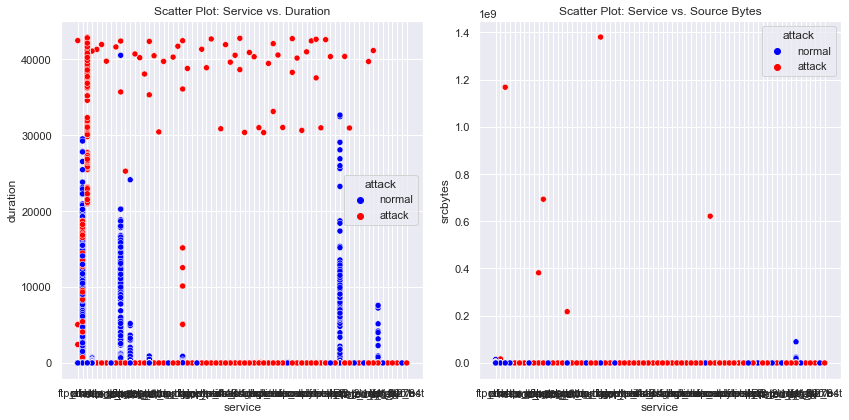

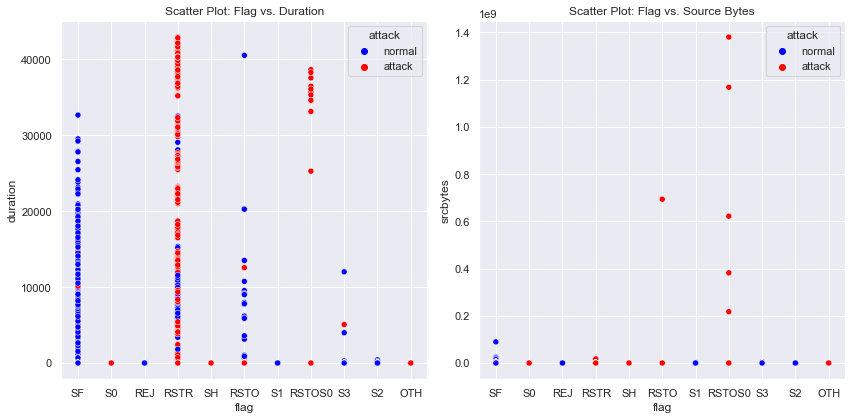

In [10]:
sns.set(style="darkgrid")

# Create individual scatter plots for 'service' vs. 'duration' and 'service' vs. 'srcbytes'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='service', y='duration', hue='attack', data=df, palette={"normal": "blue", "attack": "red"})
plt.title('Scatter Plot: Service vs. Duration')

plt.subplot(1, 2, 2)
sns.scatterplot(x='service', y='srcbytes', hue='attack', data=df, palette={"normal": "blue", "attack": "red"})
plt.title('Scatter Plot: Service vs. Source Bytes')

plt.tight_layout()
plt.show()

# Create individual scatter plots for 'flag' vs. 'duration' and 'flag' vs. 'srcbytes'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='flag', y='duration', hue='attack', data=df, palette={"normal": "blue", "attack": "red"})
plt.title('Scatter Plot: Flag vs. Duration')

plt.subplot(1, 2, 2)
sns.scatterplot(x='flag', y='srcbytes', hue='attack', data=df, palette={"normal": "blue", "attack": "red"})
plt.title('Scatter Plot: Flag vs. Source Bytes')

plt.tight_layout()
plt.show()

In [11]:
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

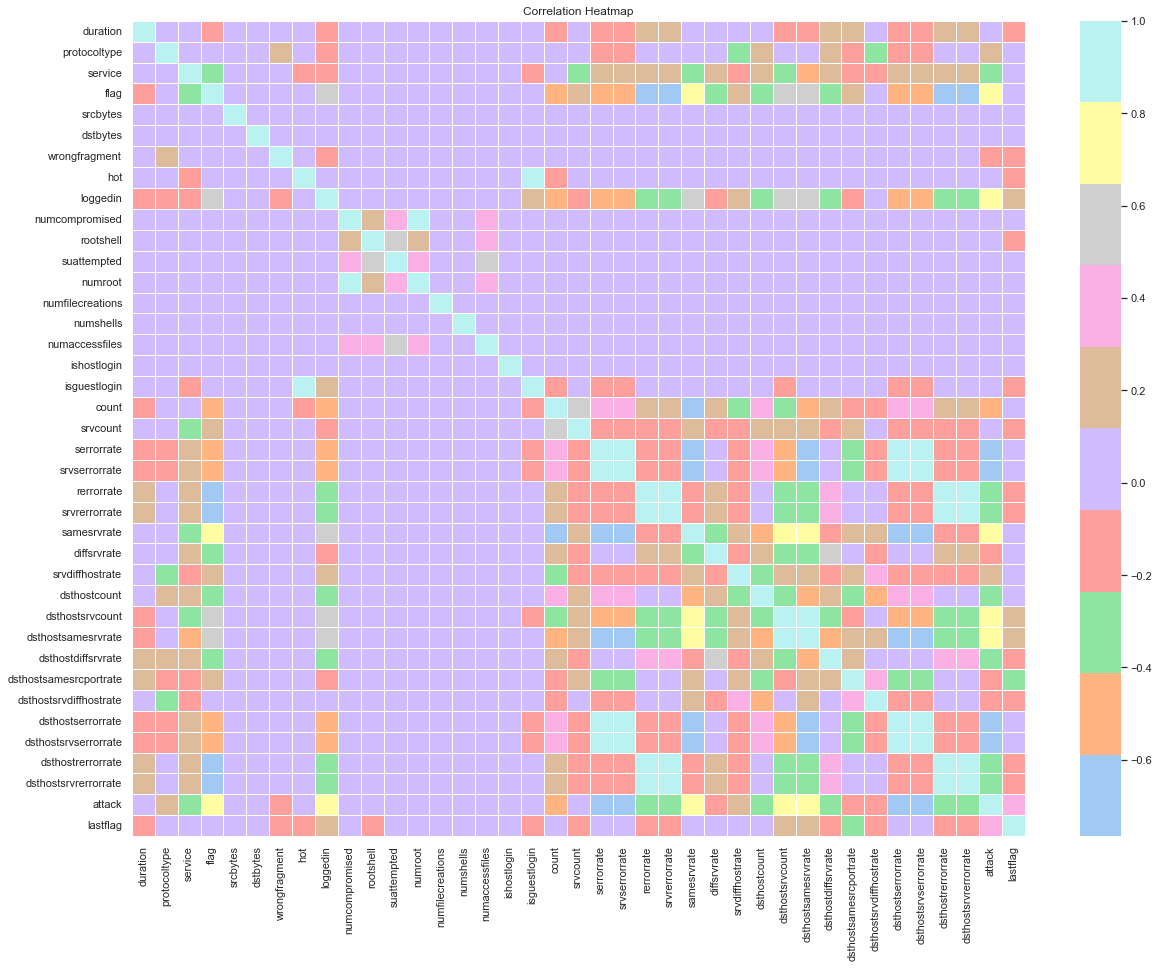

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(20, 15))

# Customize the heatmap style
sns.set(style="whitegrid")  # Set the style to whitegrid
cmap = sns.color_palette("pastel")  # Choose a custom color palette
sns.heatmap(correlation_matrix, cmap=cmap, linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [13]:
X=df.drop(['attack'],axis=1)
y=df['attack']

<AxesSubplot:xlabel='attack', ylabel='count'>

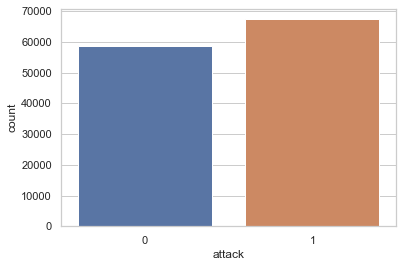

In [14]:
sns.countplot(df['attack'])

In [15]:
print("Class distribution: {}".format(Counter(y)))

Class distribution: Counter({1: 67343, 0: 58630})


In [16]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

# Using  Logistic Regression

In [17]:
lr=LogisticRegression()
lr.fit(X_transformed,y)
lr_pred=lr.predict(X_transformed)

In [18]:
lr_df=pd.DataFrame()
lr_df['actual']=y
lr_df['pred']=lr_pred

In [19]:
lr_df.head()

,actual,pred
0,1,1
1,1,0
2,0,0
3,1,1
4,1,1


In [20]:
print(accuracy_score(y, lr_pred))

0.9783207512720979


In [21]:
confusion_matrix(y, lr_pred)

array([[57558,  1072],
       [ 1659, 65684]], dtype=int64)

In [22]:
print(classification_report(y, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     58630
           1       0.98      0.98      0.98     67343

    accuracy                           0.98    125973
   macro avg       0.98      0.98      0.98    125973
weighted avg       0.98      0.98      0.98    125973



Confusion Matrix for Logistic Regression:
[[57558  1072]
 [ 1659 65684]]


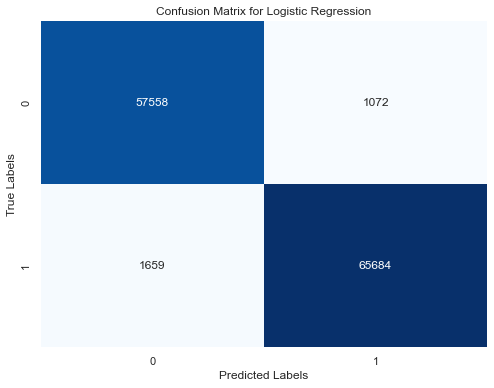

In [23]:
# Fit Logistic Regression model
lr.fit(X_transformed, y)

# Predict using the trained model
lr_pred = lr.predict(X_transformed)

# Generate the confusion matrix
cm_lr = confusion_matrix(y, lr_pred)
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Generate the confusion matrix
cm_lr = confusion_matrix(y, lr_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()